[ 4.664091    4.664091    4.66269178  4.6584941   4.65149796  4.64170421
  4.62911536  4.61373561  4.59557084  4.5746286   4.55091812  4.5244503
  4.4952377   4.46329455  4.42863673  4.39128177  4.35124883  4.30855871
  4.26323382  4.21529817  4.1647774   4.11169868  4.05609079  3.99798403
  3.93741025  3.87440281  3.80899659  3.74122792  3.6711346   3.59875589
  3.52413244  3.44730631  3.36832093  3.28722107  3.20405282  3.11886359
  3.03170202  2.94261801  2.85166269  2.75888835  2.66434844  2.56809753
  2.47019129  2.37068643  2.26964072  2.1671129   2.06316266  1.95785064
  1.85123835  1.74338816  1.63436326  1.52422762  1.41304595  1.30088366
  1.18780683  1.07388218  0.95917699  0.84375912  0.72769692  0.61105922
  0.49391526  0.37633468  0.25838746  0.1401439   0.02167453  0.09694986
  0.21565835  0.33437983  0.45304315  0.57157708  0.68991037  0.80797184
  0.92569036  1.04299494  1.15981473  1.27607911  1.39171769  1.50666039
  1.62083743  1.73417945  1.84661747  1.95808299  2.

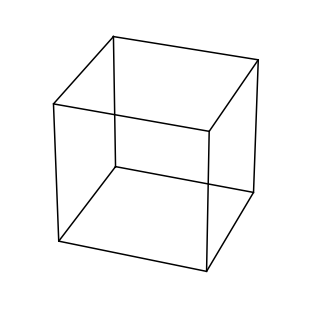

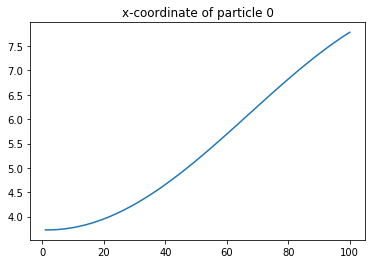

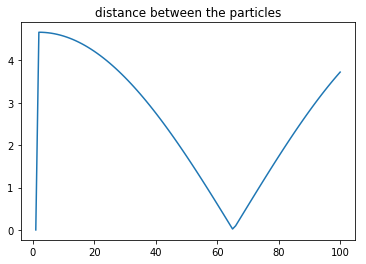

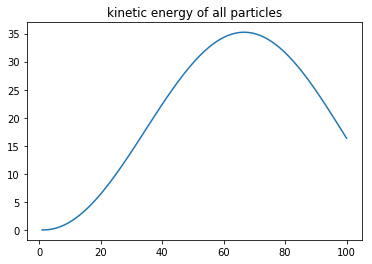

In [53]:

import numpy as np
import matplotlib.pyplot as plt

from anim import make_3d_animation

# Physical values are defined globally
dim = 2
L = 10 # length of box
m = 1 # mass of particles


def build_matrices(n_timesteps, n_particles):
    vel = np.zeros(shape=(Nt, N_particle, dim), dtype=float)
    pos = np.zeros(shape=(Nt, N_particle, dim), dtype=float)
    F = np.zeros(shape=(Nt, N_particle, dim), dtype=float)
    dis = np.zeros(Nt)
    return(vel,pos,F,dis)


def initial_state(N_particles, vel,pos):
    #vel[0] = np.random.rand(N_particles, dim) * L
    pos[0] = np.random.rand(N_particles, dim) * L
    return(vel,pos)

def calculate_time_evolution(Nt, N_particle, vel, pos, dis, F):

    # distance = squareroot((dx)^2 + (dy)^2 + (dz)^2)
    #dis[0] = (sum((pos[0,0,:] - pos[0,1,:])**2))**0.5 
    #if dis[0] > L/2:
    
    # min_dis is the minimum distance between particle 0 and particle 1 in a periodic box
    # n is the matrix which translates the particle to the surrounding boxes.
    min_dis = np.zeros([Nt])
    n = np.array([[0, 0], [1, 0], [0,1], [1,1], [-1, 0], [0, -1], [-1, -1], [1, -1], [-1, 1]])*L
    
    direction = np.zeros((N_particle, dim))
    direction[0,:] = - (pos[0,0,:] - pos[0,1,:])
    
    # minus sign for attractive forces                                       
    #direction[1,:] = -(pos[0,1,:] - pos[0,0,:])

    F[0,0] = 3 * direction[0,:]
    F[0,1] = 3 * direction[1,:]
    

    for v in range(1,Nt):        
        pos[v] = (pos[v-1]+(1/Nt)*vel[v-1]) % L

        # velocity = vel[t-1] + 1/m * h * F[t-1]  p
        vel[v,:,:] = vel[v-1,:,:]+(1/m)*(1/Nt)*F[v-1,:,:]

        # direction of the line drawn between particles along which the force 
        # acts. For each particle a seperate direction vector is calculated.
        # the direction vector is not saved for different timesteps. 
        direction[0,:] = -(pos[v-1,0,:] - pos[v-1,1,:]) 
        # minus sign for attractive forces
        direction[1,:] = -(pos[v-1,1,:] - pos[v-1,0,:])

        # force along the line between particles
        F[v,0] = 3 * direction[0,:]
        F[v,1] = 3 * direction[1,:]

        # distance = squareroot((dx)^2 + (dy)^2 + (dz)^2) 
        dis[v] = (sum((pos[v,0,:] - pos[v,1,:])**2))**0.5
        
        # minimum distance between particle 0 and the 9 surrounding particles defined by particle 1.
        min_dis[0] = np.min(np.sum((pos[0,0,:]-pos[0,1,:]+n)**2, axis=1)**0.5)
        min_dis[v] = np.min(np.sum((pos[v,0,:]-pos[v,1,:]+n)**2, axis=1)**0.5)
        
    print(min_dis)     
            
    return(vel,pos,dis)


def calculate_kinetic_energy(n_timesteps, vel):
    # for each particle the kinetic energy is:
    # E_{kin} = 0.5 m (v_x^2 + v_y^2 + v_z^2)
    # the total kinetic energy is the sum of all particles
    kinetic_energy = 0.5 * m * (np.sum(vel[:,0,:]**2, axis=1) + np.sum(vel[:,1,:]**2, axis=1))
    return(kinetic_energy)


if __name__ == "__main__":    
    N_particle = 2
    Nt = 100 # number of timesteps  
    time = np.linspace(1,Nt,Nt)

    vel,pos,F,dis = build_matrices(Nt, N_particle)
    vel,pos = initial_state(N_particle,vel,pos)
    vel,pos,dis = calculate_time_evolution(Nt, N_particle, vel, pos, dis,F)    
    kin_energy = calculate_kinetic_energy(Nt,vel)
    
    anim = make_3d_animation(L, pos, delay=30, rotate_on_play=0)

    plt.figure()
    # plots the x-cordinate of particle 0 
    plt.plot(time,pos[:,0,0])
    plt.title('x-coordinate of particle 0')

    # plots the distance between the particles
    plt.figure()
    plt.plot(time,dis)
    plt.title('distance between the particles')
    

    plt.figure()
    plt.plot(time,kin_energy)
    plt.title('kinetic energy of all particles')
    plt.show()




In [37]:
def function(n,pos):

    for i in range(0,9):
        min_dis = (sum(pos[0,0,:]- pos[0,1,:] + n[i,:]))**2
        print((min_dis))
    return min_dis
 
x = np.zeros([9,2])
n = np.array([[0, 0], [1, 0], [0,1], [1,1], [-1, 0], [0, -1], [-1, -1], [1, -1], [-1, 1]])*L
x = np.min(np.sum((pos[0,0,:]-pos[0,1,:]+n)**2, axis=1)**0.5)

print(x)

#for i in range(0,9):
#    x[i,:] = np.sum((pos[0,0,:]- pos[0,1,:] + n[i,:])**2)
#    print(x)
#(np.min(x))
    

    

   


3.89537113852
